### Opis projektu
Projekt polegający na stworzeniu i wyuczeniu sieci neuronowej w celu kolorowania obrazu czarno-białego.

## Imports

In [ ]:
import cv2
import numpy as np

import tensorflow_datasets as tfds
import tensorflow as tf

from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Flatten, BatchNormalization, Conv2D, MaxPooling2D, InputLayer, UpSampling2D
from tensorflow.keras.optimizers import RMSprop, Adam
from tensorflow.keras.optimizers.schedules import ExponentialDecay

from skimage.color import rgb2lab, lab2rgb
import matplotlib.pyplot as plt

## Models definitions

In [ ]:
model_four = Sequential([
  InputLayer(input_shape=(128, 128, 1)),
  Conv2D(64, (3, 3), activation='relu', padding='same'),
  Conv2D(64, (3, 3), activation='relu', padding='same', strides=2),
  Conv2D(128, (3, 3), activation='relu', padding='same'),
  Conv2D(128, (3, 3), activation='relu', padding='same', strides=2),
  Conv2D(256, (3, 3), activation='relu', padding='same'),
  Conv2D(256, (3, 3), activation='relu', padding='same', strides=2),
  Conv2D(512, (3, 3), activation='relu', padding='same'),
  Conv2D(256, (3, 3), activation='relu', padding='same'),
  Conv2D(128, (3, 3), activation='relu', padding='same'),
  UpSampling2D((2, 2)),
  Conv2D(64, (3, 3), activation='relu', padding='same'),
  UpSampling2D((2, 2)),
  Conv2D(32, (3, 3), activation='relu', padding='same'),
  Conv2D(2, (3, 3), activation='tanh', padding='same'),
  UpSampling2D((2, 2))        
])

model_four.compile(optimizer=RMSprop(),
                  loss='mse',
                  metrics=['accuracy'])

In [ ]:
model_two = Sequential([
  InputLayer(input_shape=(128, 128, 1)),
  Conv2D(64, (3, 3), activation='relu', padding='same'),
  Conv2D(64, (3, 3), activation='relu', padding='same', strides=2),
  Dropout(0.2),
  Conv2D(128, (3, 3), activation='relu', padding='same'),
  Conv2D(128, (3, 3), activation='relu', padding='same', strides=2),
  Dropout(0.2),
  Conv2D(256, (3, 3), activation='relu', padding='same'),
  Conv2D(256, (3, 3), activation='relu', padding='same', strides=2),
  Dropout(0.2),
  Conv2D(512, (3, 3), activation='relu', padding='same'),
  Dropout(0.2),
  Conv2D(256, (3, 3), activation='relu', padding='same'),
  Dropout(0.3),
  Conv2D(128, (3, 3), activation='relu', padding='same'),
  Dropout(0.3),
  UpSampling2D((2, 2)),
  Conv2D(64, (3, 3), activation='relu', padding='same'),
  Dropout(0.2),
  UpSampling2D((2, 2)),
  Conv2D(32, (3, 3), activation='relu', padding='same'),
  Dropout(0.2),
  Conv2D(2, (3, 3), activation='tanh', padding='same'),
  Dropout(0.2),
  UpSampling2D((2, 2))        
])

model_two.compile(optimizer=Adam(lr=0.001),
                  loss='mse',
                  metrics=['accuracy'])

In [ ]:
model_three = Sequential([
  InputLayer(input_shape=(128, 128, 1)),
  Conv2D(64, (3, 3), activation='relu', padding='same'),
  BatchNormalization(momentum=0.95),
  Conv2D(64, (3, 3), activation='relu', padding='same', strides=2),
  BatchNormalization(momentum=0.95),
  Conv2D(128, (3, 3), activation='relu', padding='same'),
  BatchNormalization(momentum=0.95),
  Conv2D(128, (3, 3), activation='relu', padding='same', strides=2),
  BatchNormalization(momentum=0.95),
  Conv2D(256, (3, 3), activation='relu', padding='same'),
  BatchNormalization(momentum=0.95),
  Conv2D(256, (3, 3), activation='relu', padding='same', strides=2),
  BatchNormalization(momentum=0.95),
  Conv2D(512, (3, 3), activation='relu', padding='same'),
  BatchNormalization(momentum=0.95),
  Conv2D(256, (3, 3), activation='relu', padding='same'),
  BatchNormalization(momentum=0.95),
  Conv2D(128, (3, 3), activation='relu', padding='same'),
  BatchNormalization(momentum=0.95),
  UpSampling2D((2, 2)),
  Conv2D(64, (3, 3), activation='relu', padding='same'),
  BatchNormalization(momentum=0.95),
  UpSampling2D((2, 2)),
  Conv2D(32, (3, 3), activation='relu', padding='same'),
  BatchNormalization(momentum=0.95),
  Conv2D(2, (3, 3), activation='tanh', padding='same'),
  BatchNormalization(momentum=0.95),
  UpSampling2D((2, 2))        
])

model_three.compile(optimizer=Adam(lr=0.001),
                  loss='mse',
                  metrics=['accuracy'])

In [ ]:
model_four = Sequential([
  InputLayer(input_shape=(128, 128, 1)),
  Conv2D(64, (3, 3), activation='relu', padding='same'),
  BatchNormalization(momentum=0.95),
  Conv2D(64, (3, 3), activation='relu', padding='same', strides=2),
  BatchNormalization(momentum=0.95),
  Conv2D(128, (3, 3), activation='relu', padding='same'),
  BatchNormalization(momentum=0.95),
  Conv2D(128, (3, 3), activation='relu', padding='same', strides=2),
  BatchNormalization(momentum=0.95),
  Conv2D(256, (3, 3), activation='relu', padding='same'),
  BatchNormalization(momentum=0.95),
  Conv2D(256, (3, 3), activation='relu', padding='same', strides=2),
  BatchNormalization(momentum=0.95),
  Conv2D(512, (3, 3), activation='relu', padding='same'),
  BatchNormalization(momentum=0.95),
  Conv2D(256, (3, 3), activation='relu', padding='same'),
  BatchNormalization(momentum=0.95),
  Conv2D(128, (3, 3), activation='relu', padding='same'),
  BatchNormalization(momentum=0.95),
  UpSampling2D((2, 2)),
  Conv2D(64, (3, 3), activation='relu', padding='same'),
  BatchNormalization(momentum=0.95),
  UpSampling2D((2, 2)),
  Conv2D(32, (3, 3), activation='relu', padding='same'),
  BatchNormalization(momentum=0.95),
  Conv2D(2, (3, 3), activation='tanh', padding='same'),
  BatchNormalization(momentum=0.95),
  UpSampling2D((2, 2))        
])

model_four.compile(optimizer=Adam(ExponentialDecay(initial_learning_rate=0.001, decay_steps=10000, decay_rate=0.99)),
                  loss='mse',
                  metrics=['accuracy'])

## Create dataset

In [ ]:
input_shape = 32
batch_size = 10

how_many_images = 1000

In [ ]:
def check_shape(img):
  shape = tf.shape(img)
  if shape[0] >= input_shape and shape[1] >= input_shape:
    return True
  else:
    return False

def reshape_image(img):
  shape = tf.shape(img)
  sliced = img
  if(shape[0] != shape[1]):
    shape_2 = shape[0] if shape[0] < shape[1] else shape[1]
    x = 0 if shape[0] < shape[1] else int((shape[0] - shape[1]) / 2)
    y = 0 if shape[0] > shape[1] else int((shape[1] - shape[0]) / 2)
    start_pt = [x, y, 0]
    sliced = tf.slice(img, start_pt, [shape_2, ref_shape_2, 3])
  final = tf.image.resize(sliced, [input_shape, input_shape], method='nearest') 
  return final

In [ ]:
dataset = tfds.load(name='imagenette', split='train')

dataset = dataset.filter(lambda x: check_shape(x['image']))\
                 .map(lambda y: y['image'])\
                 .map(lambda z: reshape_image(z))\
                 .shuffle(1024)

dataset = list(dataset.take(how_many_images).as_numpy_iterator())

In [ ]:
x_train = []
y_train = []
x_test = []
y_test = []

for index, image in enumerate(dataset):
  img_lab = rgb2lab(image / 255.0)
  if (index < int(0.90 * len(dataset))):
    x_train.append(img_lab[:, :, 0:1])
    y_train.append(img_lab[:, :, 1:] / 128.0)
  else:
    x_test.append(img_lab[:, :, 0:1])
    y_test.append(img_lab[:, :, 1:] / 128.0) 

In [ ]:
x_train_tensor = tf.convert_to_tensor(np.asarray(x_train))
y_train_tensor = tf.convert_to_tensor(np.asarray(y_train))
x_test_tensor = tf.convert_to_tensor(np.asarray(x_test))
y_test_tensor = tf.convert_to_tensor(np.asarray(y_test))

## Model fitting and testing

In [ ]:
result_one_batch10 = model_one.fit(x_train_tensor, y_train_tensor,
                       batch_size=batch_size,
                       epochs=10,
                       validation_data=(x_test_tensor, y_test_tensor))

model_one.save_weights("firstModelBatch10.h5")

plt.plot(result_one.history["accuracy"],label="Pierwszy model batch=10")
plt.title("Accuracy dla zbioru treningowego")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

plt.plot(result_one_batch10.history["loss"], label="Pierwszy model batch=10")
plt.title("Loss[MSE] dla zbioru treningowego")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [ ]:
result_one_batch20 = model_one.fit(x_train_tensor, y_train_tensor,
                       batch_size=20,
                       epochs=10,
                       validation_data=(x_test_tensor, y_test_tensor))

model_one.save_weights("firstModelBatch20.h5")

plt.plot(result_one_batch20.history["accuracy"],label="Pierwszy model batch=20")
plt.title("Accuracy dla zbioru treningowego")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

plt.plot(result_one_batch20.history["loss"], label="Pierwszy model batch=20")
plt.title("Loss[MSE] dla zbioru treningowego")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

Epoch 1/10


90/90 [==============================] - ETA: 0s - loss: 0.0365 - accuracy: 0.5729WARNING:tensorflow:Model was constructed with shape (None, 128, 128, 1) for input KerasTensor(type_spec=TensorSpec(shape=(None, 128, 128, 1), dtype=tf.float32, name='input_13'), name='input_13', description="created by layer 'input_13'"), but it was called on an input with incompatible shape (10, 32, 32, 1).


90/90 [==============================] - 25s 271ms/step - loss: 0.0363 - accuracy: 0.5731 - val_loss: 0.0162 - val_accuracy: 0.6631
Epoch 2/10
90/90 [==============================] - 24s 262ms/step - loss: 0.0156 - accuracy: 0.6257 - val_loss: 0.0161 - val_accuracy: 0.6631
Epoch 3/10
90/90 [==============================] - 24s 261ms/step - loss: 0.0155 - accuracy: 0.6106 - val_loss: 0.0163 - val_accuracy: 0.6631
Epoch 4/10
90/90 [==============================] - 24s 262ms/step - loss: 0.0162 - accuracy: 0.6073 - val_loss: 0.0161 - val_accuracy: 0.6631
Epoch 5/10
90/90 [==============================] - 23s 261ms/step - loss: 0.0148 - accuracy: 0.6215 - val_loss: 0.0161 - val_accuracy: 0.6631
Epoch 6/10
90/90 [==============================] - 24s 262ms/step - loss: 0.0156 - accuracy: 0.5996 - val_loss: 0.0162 - val_accuracy: 0.6631
Epoch 7/10
90/90 [==============================] - 24s 263ms/step - loss: 0.0151 - accuracy: 0.6094 - val_loss: 0.0162 - val_accuracy: 0.6631
Epoch 8/10

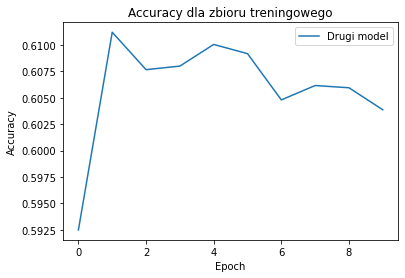

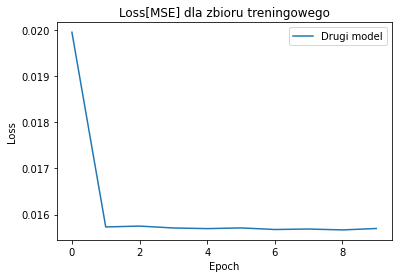

In [ ]:
result_two = model_two.fit(x_train_tensor, y_train_tensor,
                       batch_size=batch_size,
                       epochs=10,
                       validation_data=(x_test_tensor, y_test_tensor))

model_two.save_weights("secondModel.h5")

plt.plot(result_two.history["accuracy"],label="Drugi model")
plt.title("Accuracy dla zbioru treningowego")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

plt.plot(result_two.history["loss"], label="Drugi model")
plt.title("Loss[MSE] dla zbioru treningowego")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

Epoch 1/10


90/90 [==============================] - ETA: 0s - loss: 0.9574 - accuracy: 0.5014WARNING:tensorflow:Model was constructed with shape (None, 128, 128, 1) for input KerasTensor(type_spec=TensorSpec(shape=(None, 128, 128, 1), dtype=tf.float32, name='input_8'), name='input_8', description="created by layer 'input_8'"), but it was called on an input with incompatible shape (10, 32, 32, 1).


90/90 [==============================] - 26s 278ms/step - loss: 0.9569 - accuracy: 0.5014 - val_loss: 0.7383 - val_accuracy: 0.4275
Epoch 2/10
90/90 [==============================] - 25s 276ms/step - loss: 0.7714 - accuracy: 0.5076 - val_loss: 0.5432 - val_accuracy: 0.4865
Epoch 3/10
90/90 [==============================] - 25s 275ms/step - loss: 0.6405 - accuracy: 0.4789 - val_loss: 0.5702 - val_accuracy: 0.4911
Epoch 4/10
90/90 [==============================] - 25s 277ms/step - loss: 0.5320 - accuracy: 0.5358 - val_loss: 0.6378 - val_accuracy: 0.4504
Epoch 5/10
90/90 [==============================] - 25s 275ms/step - loss: 0.4210 - accuracy: 0.5603 - val_loss: 0.3946 - val_accuracy: 0.4240
Epoch 6/10
90/90 [==============================] - 25s 275ms/step - loss: 0.3337 - accuracy: 0.5090 - val_loss: 0.2983 - val_accuracy: 0.4703
Epoch 7/10
90/90 [==============================] - 25s 275ms/step - loss: 0.2567 - accuracy: 0.5640 - val_loss: 0.2019 - val_accuracy: 0.4814
Epoch 8/10

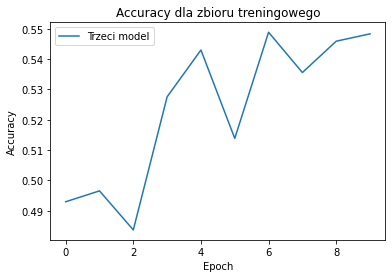

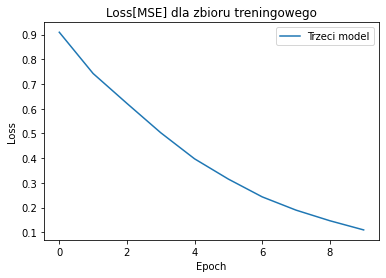

In [ ]:
result_three = model_three.fit(x_train_tensor, y_train_tensor,
                       batch_size=batch_size,
                       epochs=10,
                       validation_data=(x_test_tensor, y_test_tensor))

model_three.save_weights("thirdModel.h5")

plt.plot(result_three.history["accuracy"],label="Trzeci model")
plt.title("Accuracy dla zbioru treningowego")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

plt.plot(result_three.history["loss"], label="Trzeci model")
plt.title("Loss[MSE] dla zbioru treningowego")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

Epoch 1/10


90/90 [==============================] - ETA: 0s - loss: 0.9583 - accuracy: 0.5186WARNING:tensorflow:Model was constructed with shape (None, 128, 128, 1) for input KerasTensor(type_spec=TensorSpec(shape=(None, 128, 128, 1), dtype=tf.float32, name='input_10'), name='input_10', description="created by layer 'input_10'"), but it was called on an input with incompatible shape (10, 32, 32, 1).


90/90 [==============================] - 26s 276ms/step - loss: 0.9579 - accuracy: 0.5184 - val_loss: 0.9348 - val_accuracy: 0.4349
Epoch 2/10
90/90 [==============================] - 25s 273ms/step - loss: 0.7782 - accuracy: 0.4745 - val_loss: 0.6346 - val_accuracy: 0.4764
Epoch 3/10
90/90 [==============================] - 24s 271ms/step - loss: 0.6336 - accuracy: 0.5030 - val_loss: 0.5418 - val_accuracy: 0.5440
Epoch 4/10
90/90 [==============================] - 24s 272ms/step - loss: 0.5208 - accuracy: 0.5150 - val_loss: 0.4309 - val_accuracy: 0.5481
Epoch 5/10
90/90 [==============================] - 24s 272ms/step - loss: 0.4140 - accuracy: 0.5388 - val_loss: 0.5163 - val_accuracy: 0.4403
Epoch 6/10
90/90 [==============================] - 25s 273ms/step - loss: 0.3279 - accuracy: 0.5448 - val_loss: 0.2296 - val_accuracy: 0.5484
Epoch 7/10
90/90 [==============================] - 25s 274ms/step - loss: 0.2559 - accuracy: 0.5400 - val_loss: 0.2344 - val_accuracy: 0.5367
Epoch 8/10

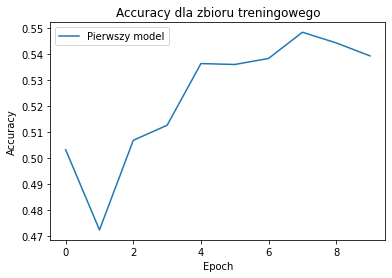

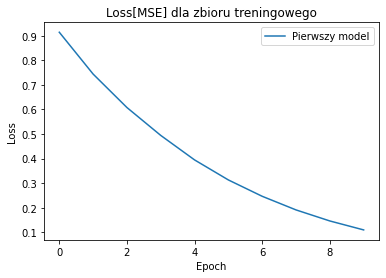

In [ ]:
result_four = model_four.fit(x_train_tensor, y_train_tensor,
                       batch_size=batch_size,
                       epochs=10,
                       validation_data=(x_test_tensor, y_test_tensor))

model_four.save_weights("fourthModel.h5")

plt.plot(result_four.history["accuracy"],label="Pierwszy model")
plt.title("Accuracy dla zbioru treningowego")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

plt.plot(result_four.history["loss"], label="Pierwszy model")
plt.title("Loss[MSE] dla zbioru treningowego")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

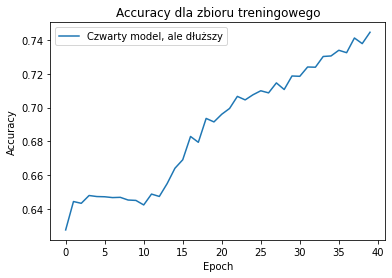

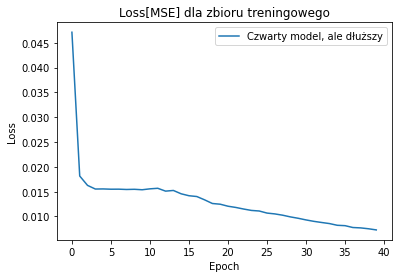

In [ ]:
model_four.save_weights("fourthLongerModel.h5")

plt.plot(result_four_but_longer.history["accuracy"],label="Czwarty model, ale dłuższy")
plt.title("Accuracy dla zbioru treningowego")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

plt.plot(result_four_but_longer.history["loss"], label="Czwarty model, ale dłuższy")
plt.title("Loss[MSE] dla zbioru treningowego")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [ ]:
result_four_but_longer = model_four.fit(x_train_tensor, y_train_tensor,
                       batch_size=batch_size,
                       epochs=40,
                       validation_data=(x_test_tensor, y_test_tensor))

Epoch 1/40


90/90 [==============================] - ETA: 0s - loss: 0.1313 - accuracy: 0.5909WARNING:tensorflow:Model was constructed with shape (None, 128, 128, 1) for input KerasTensor(type_spec=TensorSpec(shape=(None, 128, 128, 1), dtype=tf.float32, name='input_15'), name='input_15', description="created by layer 'input_15'"), but it was called on an input with incompatible shape (10, 32, 32, 1).


90/90 [==============================] - 25s 264ms/step - loss: 0.1304 - accuracy: 0.5913 - val_loss: 0.0162 - val_accuracy: 0.6631
Epoch 2/40
90/90 [==============================] - 24s 263ms/step - loss: 0.0177 - accuracy: 0.6445 - val_loss: 0.0162 - val_accuracy: 0.6626
Epoch 3/40
90/90 [==============================] - 24s 263ms/step - loss: 0.0162 - accuracy: 0.6375 - val_loss: 0.0161 - val_accuracy: 0.6631
Epoch 4/40
90/90 [==============================] - 24s 263ms/step - loss: 0.0149 - accuracy: 0.6382 - val_loss: 0.0161 - val_accuracy: 0.6631
Epoch 5/40
90/90 [==============================] - 24s 264ms/step - loss: 0.0163 - accuracy: 0.6421 - val_loss: 0.0161 - val_accuracy: 0.6631
Epoch 6/40
90/90 [==============================] - 24s 263ms/step - loss: 0.0163 - accuracy: 0.6515 - val_loss: 0.0162 - val_accuracy: 0.6631
Epoch 7/40
90/90 [==============================] - 24s 263ms/step - loss: 0.0158 - accuracy: 0.6422 - val_loss: 0.0161 - val_accuracy: 0.6536
Epoch 8/40

AttributeError: ignored

## Podsumowanie

Podsumowanie:
0. Niestety z powodów ograniczeń połączenia sieciowego byłem zmuszony przeprowadzać testy dla bardzo niewielkiej próbki 900 zdjęć, o wielkości zaledwie 32x32, a także bardzo niewielkiej długości trwania epok oraz batchach wielkości 10-20.
1. Do wytrenowania sieci wykorzystany został zbiór różnych zdjęć o wielkości 32x32, przy podziale 90% zbiór treningowy i 10% walidacyjny. Parametrami pomiarowymi są funkcja staty (Mean Squared Error) oraz accuracy.
2. Pierwotnie wykorzystany został optymalizator RMSProp, dający dość wyraźne wyniki.
W następnych przypadkach został wykorzystany optymalizator Adam, który dał stosunkowo lepsze wyniki. Stała uczenia stabilnie rosła przez większość epok, mniej widoczne stały się także znaczące zaniki w uczeniu.
2. Jako techniki regularyzacji przetestowano:
  * warstwy dropoutu, ignorującej wskazany procent podczas treningu, co nie wpłynęło znacząco na same wyniki
  * parametr momentum = 0.95, aby poprawnie wytrenować sieć powinno się dążyć do osiągnięcia ekstremów globalnych, wartości te osiąga się zazwyczaj dla zakresu ok. 0.9 - 0.999. W przypadku złego ustawienia trening może zatrzymać się w niepożądanych minimum lokalnym
  * w przypadku zwyczajnego zwiększenia liczby epok, mogliśmy się spotkać z poprawą wyników w czasie. Im dłużej trwa uczenie sieci, tym więcej cech jest w stanie odnaleźć, lecz trzeba mieć na uwadze by nie doprowadzić do przeuczenia sieci. (widać stały przyrost)
3. Wniosek - sieci jest zdecydowanie daleko do odwzorowania rzeczywistych kolorów, lecz przynajmniej możemy natrafić na stosunkuwo ciekawegą kolorystykę. 

In:


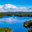

Out:


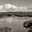

In:


/usr/local/lib/python3.6/dist-packages/skimage/color/colorconv.py:1068: UserWarning: Color data out of range: Z < 0 in 19 pixels
  return xyz2rgb(lab2xyz(lab, illuminant, observer))


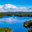

Out:


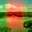

In:


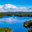

Out:


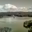

In [ ]:
import PIL.Image
import IPython.display

titanic = PIL.Image.open('jezioro.jpg')
titanic = titanic.resize((32, 32))
titanic = np.array(titanic)

titanic_lab = rgb2lab(titanic / 255.0)
titanic_tf = tf.convert_to_tensor(titanic_lab)
titanic_tf = reshape_image(titanic_tf)
titanic_tf = tf.expand_dims(titanic_tf[:, :, 0:1], axis=0)


titanic_out = model_two.predict(titanic_tf)
titanic_out = lab2rgb(tf.concat([titanic_tf, titanic_out * 128], 3).numpy()[0])
print('In:')
IPython.display.display(PIL.Image.fromarray(reshape_image(tf.convert_to_tensor(titanic)).numpy()))
print('Out:')
IPython.display.display(PIL.Image.fromarray((titanic_out * 255).astype('uint8')))

titanic_out = model_three.predict(titanic_tf)
titanic_out = lab2rgb(tf.concat([titanic_tf, titanic_out * 128], 3).numpy()[0])
print('In:')
IPython.display.display(PIL.Image.fromarray(reshape_image(tf.convert_to_tensor(titanic)).numpy()))
print('Out:')
IPython.display.display(PIL.Image.fromarray((titanic_out * 255).astype('uint8')))

titanic_out = model_four.predict(titanic_tf)
titanic_out = lab2rgb(tf.concat([titanic_tf, titanic_out * 128], 3).numpy()[0])
print('In:')
IPython.display.display(PIL.Image.fromarray(reshape_image(tf.convert_to_tensor(titanic)).numpy()))
print('Out:')
IPython.display.display(PIL.Image.fromarray((titanic_out * 255).astype('uint8')))